# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

This data represents 17 campaigns with 79354 contacts gathered. The campaigns were all phone campaigns conducted between May 2008 and November 2010.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [53]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC 
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.model_selection import GridSearchCV 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [54]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [55]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The business problem is to correctly identify the customers who are likely to subscribe to the term deposit. The bank can then target these customers with promotional offers. The bank can also use the model to identify the key drivers that influence the customers' decision to subscribe to the term deposit.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [57]:
bank_df = df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'y']].copy()
bank_df['y'].value_counts()


no     36548
yes     4640
Name: y, dtype: int64

In [58]:
#Clean and one hot encode the data
bank_df = pd.get_dummies(bank_df, columns=['job', 'marital', 'education', 'contact'], drop_first=True)
bank_df['y'] = bank_df['y'].map({'yes': 1, 'no': 0})
bank_df['housing'] = bank_df['housing'].map({'yes': 1, 'no': 0})
bank_df['default'] = bank_df['default'].map({'yes': 1, 'no': 0})
bank_df['loan'] = bank_df['loan'].map({'yes': 1, 'no': 0})
bank_df.dropna(inplace=True)
bank_df.head()

,default,housing,loan,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_telephone
0,0.0,0.0,0.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.0,1.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.0,0.0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0.0,0.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6,0.0,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [59]:
X = bank_df.drop('y', axis=1)
y = bank_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

The stated success rate of the marketing campaign was 8%, with 79354 contacts and 6499 successes. We should aim to be able to identify these successful candidates as best as possible. To determine a baseline, we will use the sklearn DummyClassifier(). We will use uniform predictions

In [60]:
baseline = DummyClassifier(strategy='stratified').fit(X_train, y_train)
baseline_predictions = baseline.predict(X_test)
baseline_accuracy = accuracy_score(baseline_predictions, y_test)
print(f'Baseline accuracy score: {baseline_accuracy}')


Baseline accuracy score: 0.7818096135721018


We will attempt to beat the accuracy score of: 0.7706566132579328

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [61]:
logistic = LogisticRegression().fit(X_train, y_train)
logistic_predictions = logistic.predict(X_test)
logisitic_train_predictions = logistic.predict(X_train)


### Problem 9: Score the Model

What is the accuracy of your model?

In [62]:
logistic_accuracy = accuracy_score(logistic_predictions, y_test)
print(f'Logistic accuracy score: {logistic_accuracy}')

Logistic accuracy score: 0.8704052780395853


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [63]:
#Logistic Regression
t0 = time.time()

logistic = LogisticRegression().fit(X_train, y_train)

logistic_predictions = logistic.predict(X_test)
logisitic_train_predictions = logistic.predict(X_train)

t1 = time.time()

logistic_accuracy = accuracy_score(logistic_predictions, y_test)
logistic_train_accuracy = accuracy_score(logisitic_train_predictions, y_train)

print(f'Logistic accuracy score: {logistic_accuracy}')
print(f'Logistic train accuracy score: {logistic_train_accuracy}')
print(f'Logistic time to train: {t1-t0}')

Logistic accuracy score: 0.8704052780395853
Logistic train accuracy score: 0.8712984054669703
Logistic time to train: 0.14517521858215332


In [64]:
#KNN
t2 = time.time()

knn = KNC().fit(X_train.values, y_train.values)

knn_train_predictions = knn.predict(X_train.values)
knn_predictions = knn.predict(X_test.values)

t3 = time.time()

knn_train_accuracy = accuracy_score(knn_train_predictions, y_train)
knn_accuracy = accuracy_score(knn_predictions, y_test)

print(f'KNN accuracy score: {knn_accuracy}')
print(f'KNN train accuracy score: {knn_train_accuracy}')
print(f'KNN time to train: {t3-t2}')

KNN accuracy score: 0.8517122211749921
KNN train accuracy score: 0.8596732385515671
KNN time to train: 1.3083889484405518


In [65]:
#SVM
t4 = time.time()

svm = SVC().fit(X_train, y_train)

svm_train_predictions = svm.predict(X_train)
svm_predictions = svm.predict(X_test)
t5 = time.time()

svm_train_accuracy = accuracy_score(svm_train_predictions, y_train)
svm_accuracy = accuracy_score(svm_predictions, y_test)

print(f'SVM accuracy score: {svm_accuracy}')
print(f'SVM train accuracy score: {svm_train_accuracy}')
print(f'SVM time to train: {t5-t4}')


SVM accuracy score: 0.8704052780395853
SVM train accuracy score: 0.8713376796795225
SVM time to train: 35.041759967803955


In [66]:
#DTC
t6 = time.time()

dtc = DTC().fit(X_train, y_train)

dtc_train_predictions = dtc.predict(X_train)
dtc_predictions = dtc.predict(X_test)
t7 = time.time()

dtc_train_accuracy = accuracy_score(dtc_train_predictions, y_train)
dtc_accuracy = accuracy_score(dtc_predictions, y_test)

print(f'DTC accuracy score: {dtc_accuracy}')
print(f'DTC train accuracy score: {dtc_train_accuracy}')
print(f'DTC time to train: {t7-t6}')



DTC accuracy score: 0.8660069117185045
DTC train accuracy score: 0.8752651009347262
DTC time to train: 0.04417300224304199


In [67]:
results = pd.DataFrame({
  'Model': ['Logistic', 'KNN', 'SVM', 'DTC'],
  'Test Accuracy': [logistic_accuracy, knn_accuracy, svm_accuracy, dtc_accuracy],
  'Train Accuracy': [logistic_train_accuracy, knn_train_accuracy, svm_train_accuracy, dtc_train_accuracy],
  'Time to Train': [t1-t0, t3-t2, t5-t4, t7-t6]
  })

print(results)

      Model  Test Accuracy  Train Accuracy  Time to Train
0  Logistic       0.870405        0.871298       0.145175
1       KNN       0.851712        0.859673       1.308389
2       SVM       0.870405        0.871338      35.041760
3       DTC       0.866007        0.875265       0.044173


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### 12.  Does scaling have an effect on the models?


In [68]:
#Store models in list for testing
log = LogisticRegression()
svm = SVC()
knn = KNC()
dtc = DTC()

testing = [log, knn, svm, dtc]

results_array = []
#Test models
for model in testing:
  pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', model)
  ])
  pipeline.fit(X_train, y_train)

  predictions = pipeline.predict(X_test)
  accuracy = accuracy_score(predictions, y_test)
  print(f'{model} accuracy: {accuracy}')
  results_array.append(accuracy)
  
  


LogisticRegression() accuracy: 0.8704052780395853
KNeighborsClassifier() accuracy: 0.8502984605717876
SVC() accuracy: 0.8704052780395853
DecisionTreeClassifier() accuracy: 0.8660069117185045


      Model  Test Accuracy  Train Accuracy  Time to Train  Scaling Accuracy
0  Logistic       0.870405        0.871298       0.145175          0.870405
1       KNN       0.851712        0.859673       1.308389          0.850298
2       SVM       0.870405        0.871338      35.041760          0.870405
3       DTC       0.866007        0.875265       0.044173          0.866007


Text(0.5, 1.0, 'Model Accuracy')

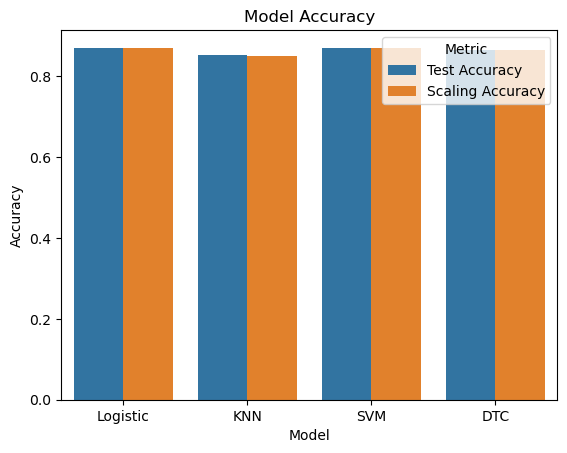

In [69]:
results['Scaling Accuracy'] = results_array
print(results)
results_barplot_format = results.melt(id_vars='Model', value_vars=['Test Accuracy', 'Scaling Accuracy'], var_name='Metric', value_name='Accuracy')
plot = sns.barplot(x='Model', y='Accuracy', hue='Metric', data=results_barplot_format)
plot.set_title('Model Accuracy')

#### Scaling does not have an effect

### 13. Does increasing the number of features have an effect on the accuracy of the model?

In [70]:
bank_df_full = df.copy()
bank_df_full = pd.get_dummies(bank_df_full, columns=['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=True)
bank_df_full['y'] = bank_df_full['y'].map({'yes': 1, 'no': 0})
bank_df_full['housing'] = bank_df_full['housing'].map({'yes': 1, 'no': 0})
bank_df_full['default'] = bank_df_full['default'].map({'yes': 1, 'no': 0})
bank_df_full['loan'] = bank_df_full['loan'].map({'yes': 1, 'no': 0})
bank_df_full.dropna(inplace=True)
bank_df_full.head()

#train test split
X = bank_df_full.drop('y', axis=1)
y = bank_df_full['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Loop through features and test models
by_model_results = []
for model in testing:
  results_array = []
  for i in range(1 , bank_df_full.shape[1] - 1):
    pipeline = Pipeline([
      ('scaler', StandardScaler()),
      ('model', model)
    ])
    pipeline.fit(X_train.iloc[ : , 0:i], y_train)

    predictions = pipeline.predict(X_test.iloc[ : , 0:i])
    accuracy = accuracy_score(predictions, y_test)
    results_array.append(accuracy)
  by_model_results.append(results_array)



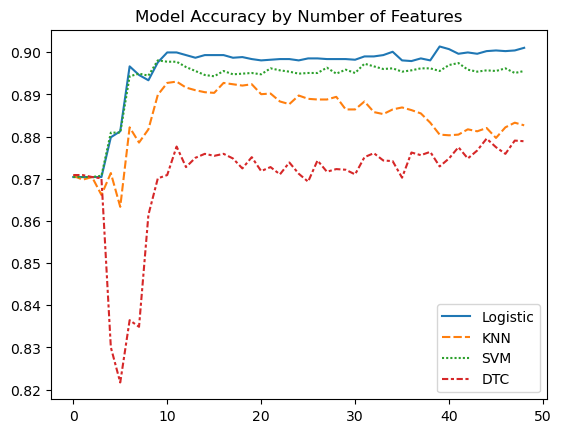

In [71]:
by_model_results_df = pd.DataFrame(by_model_results)
by_model_results_df = by_model_results_df.transpose()
by_model_results_df.rename(columns={0: 'Logistic', 1: 'KNN', 2:'SVM', 3:'DTC'}, inplace=True)
plot = sns.lineplot(data=by_model_results_df)
plot = plot.set_title('Model Accuracy by Number of Features')

#### Up to a point, increasing the number of features increases the model accuracy.
By this chart, we can see that the Logisitic Regression is the most accurate model. The other models also generally increase in accuracy up to about 10 features, but then decrease or plateau after that.

### 14. Hyperparameter Turning for Logistic Regression

Given that Logistic Regression performed the best so far without requiring an excessive amount of time to train, we will focus now on tuning some hyperparameters for it.

##### 14.a Picking a solver for logistic regression

In [72]:
#Create full dataframe for testing
bank_df_full = df.copy()
bank_df_full = pd.get_dummies(bank_df_full, columns=['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=True)
bank_df_full['y'] = bank_df_full['y'].map({'yes': 1, 'no': 0})
bank_df_full['housing'] = bank_df_full['housing'].map({'yes': 1, 'no': 0})
bank_df_full['default'] = bank_df_full['default'].map({'yes': 1, 'no': 0})
bank_df_full['loan'] = bank_df_full['loan'].map({'yes': 1, 'no': 0})
bank_df_full.dropna(inplace=True)
bank_df_full.head()

#train test split
X = bank_df_full.drop('y', axis=1)
y = bank_df_full['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
#Store solvers in list for testing
solvers = ['newton-cg', 'newton-cholesky', 'lbfgs', 'liblinear', 'sag', 'saga']

results_array = []
#Test models
for solver in solvers:
  pipeline = Pipeline([
    ('model', LogisticRegression(solver=solver))
  ])
  pipeline.fit(X_train, y_train)

  predictions = pipeline.predict(X_test)
  accuracy = accuracy_score(predictions, y_test)
  print(f'{solver} accuracy: {accuracy}')
  results_array.append(accuracy)
  
  

newton-cg accuracy: 0.899780081683946
newton-cholesky accuracy: 0.9005655042412818
lbfgs accuracy: 0.8986804901036758
liblinear accuracy: 0.8996229971724788
sag accuracy: 0.8963242224316682
saga accuracy: 0.8953817153628653


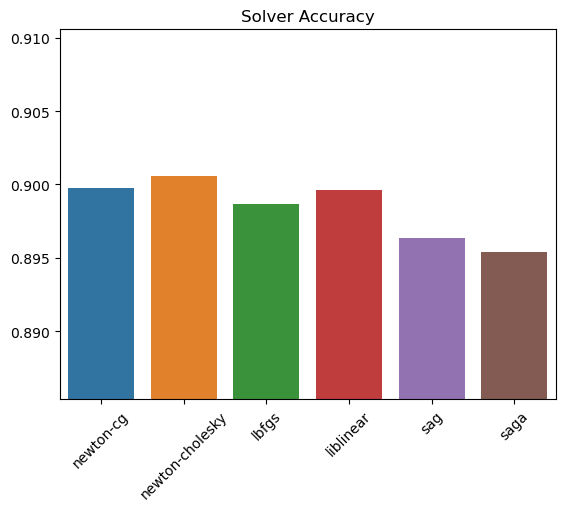

In [74]:
#plot results
plot = sns.barplot(x=solvers, y=results_array)
plot.set_title('Solver Accuracy')
plot.set_ylim(min(results_array) - 0.01, max(results_array) + 0.01)
plot.xaxis.set_tick_params(rotation=45)

##### The best solver appears to be newton-cholesky \

##### 14.b Compare solvers with penalties

In [ ]:
#Store solvers in list for testing
models = [
  LogisticRegression(solver='lbfgs', max_iter=1000, penalty='none'),
  LogisticRegression(solver='lbfgs', max_iter=1000, penalty='l2'),

  LogisticRegression(solver='liblinear', max_iter=1000 ,penalty='l1'),
  LogisticRegression(solver='liblinear', max_iter=1000, penalty='l2'),

  LogisticRegression(solver='sag', max_iter=1000, penalty='none'),
  LogisticRegression(solver='sag', max_iter=1000, penalty='l2'),

  LogisticRegression(solver='saga', max_iter=1000, penalty='none'),
  LogisticRegression(solver='saga', max_iter=1000, penalty='l2'),

  LogisticRegression(solver='newton-cg', max_iter=1000, penalty='none'),
  LogisticRegression(solver='newton-cg', max_iter=1000, penalty='l2'),

  LogisticRegression(solver='newton-cholesky', max_iter=1000, penalty='none'),
  LogisticRegression(solver='newton-cholesky', max_iter=1000, penalty='l2'),
  LogisticRegression(solver='saga', max_iter=1000, penalty='elasticnet', l1_ratio=0.5),
  LogisticRegression(solver='saga', max_iter=1000, penalty='l1')
  ]

results_array = []
#Test models
for model in models:
  pipeline = Pipeline([
    ('model', model)
  ])
  pipeline.fit(X_train, y_train)

  predictions = pipeline.predict(X_test)
  accuracy = accuracy_score(predictions, y_test)
  results_array.append(accuracy)
  
  

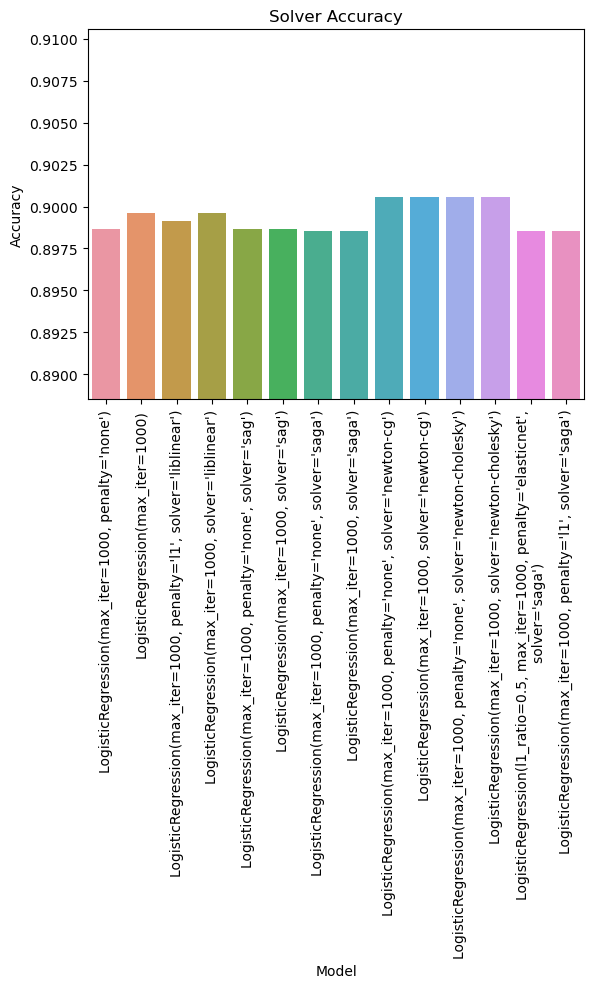

In [76]:
#plot results
result_df = pd.DataFrame({
  'Model': models,
  'Accuracy': results_array
  })
result_df['Model'] = result_df['Model'].astype(str)
plot = sns.barplot(data=result_df, x='Model', y='Accuracy')
plot.set_ylim(min(results_array) - 0.01, max(results_array) + 0.01)

plot.set_title('Solver Accuracy')
plot.xaxis.set_tick_params(rotation=90)



##### The penalties do not affect the outcome: newton-cholesky is the best solver for this case

### 15. Hyperparameter tuning for SVM 
SVM is what is referenced in the case study provided, so we will attempt to improve our results with it.

In [77]:
#Create full dataframe for testing
bank_df_full = df.copy()
bank_df_full = pd.get_dummies(bank_df_full, columns=['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=True)
bank_df_full['y'] = bank_df_full['y'].map({'yes': 1, 'no': 0})
bank_df_full['housing'] = bank_df_full['housing'].map({'yes': 1, 'no': 0})
bank_df_full['default'] = bank_df_full['default'].map({'yes': 1, 'no': 0})
bank_df_full['loan'] = bank_df_full['loan'].map({'yes': 1, 'no': 0})
bank_df_full.dropna(inplace=True)
bank_df_full.head()

#train test split
X = bank_df_full.drop('y', axis=1)
y = bank_df_full['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid_svc = GridSearchCV(SVC(), param_grid, refit = True) 

grid_svc.fit(X_train, y_train) 
print(grid_svc.best_params_)



In [79]:
best_params = {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
print(grid_svc.best_estimator_)
print(grid_svc.best_params_)
grid_predictions = grid_svc.predict(X_test)
accuracy = accuracy_score(grid_predictions, y_test)
print(f'Grid accuracy: {accuracy}')


SVC(C=0.1, gamma=0.0001)
{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
Grid accuracy: 0.9054351240967641


#### We were able to beat the logistic regression results with this grid search.


### 16. KNN Grid Search

In [ ]:
knn = KNC()
param_grid = {'n_neighbors': np.arange(1, 25), 
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
              }

grid_knn = GridSearchCV(knn, param_grid, refit = True)
grid_knn.fit(X_train, y_train)
print(grid_knn.best_params_)


In [81]:
print(grid_knn.best_estimator_)
print(grid_knn.best_params_)
grid_predictions = grid_knn.predict(X_test)
accuracy = accuracy_score(grid_predictions, y_test)
print(f'Grid accuracy: {accuracy}')



KNeighborsClassifier(algorithm='kd_tree', metric='manhattan', n_neighbors=23,
                     weights='distance')
{'algorithm': 'kd_tree', 'metric': 'manhattan', 'n_neighbors': 23, 'weights': 'distance'}
Grid accuracy: 0.8982092365692743


##### KNN results improved, but not as well as SVM. 

#### 17. DTC Grid Search


In [ ]:
dtc = DTC()

param_grid = { 
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth' : [i for i in range(1, 11)]
}

grid_dtc = GridSearchCV(dtc, param_grid, refit = True)
grid_dtc.fit(X_train, y_train)


In [83]:

print(grid_dtc.best_params_)
print(grid_dtc.best_estimator_)
predictions = grid_dtc.predict(X_test)
accuracy = accuracy_score(predictions, y_test)
accuracy


{'criterion': 'entropy', 'max_depth': 6, 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy', max_depth=6)


0.9037071944706252

##### We were able to improve the decision tree classifier significantly, but the SVC model is still better.

#### 18. Logistic Regression with GridSearchCV
We performed much of this above, but running a GridSearchCV will allow us to more easily compare optimized results to those of the other models.

In [ ]:
log = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000, 10000],
    'C': [0.1, 1, 10, 100, 1000]
}

grid_log = GridSearchCV(log, param_grid, refit = True)
grid_log.fit(X_train, y_train)



In [85]:
print(grid_log.best_params_)
print(grid_log.best_estimator_)
predictions = grid_log.predict(X_test)
accuracy = accuracy_score(predictions, y_test)
accuracy



{'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}
LogisticRegression(C=1, max_iter=1000, solver='newton-cg')


0.9005655042412818

#### 19. Conclusions and Recommendations

The testing of different models showed that the SVC classifier performs the best. The accuracy results are the highest, at 0.905. This improves upon our baseline performance, and would be reasonably useful to the banks that provided the testing data.

For the banks, they could use customer information and the SVC model created to predict whether or not they would successfully sell their product to a customer. If it was already going to be successful, they could move on to a customer that would not purchase their product. They could then target this customer with promotions and special offers to try and convince them otherwise.

The best source for this data is likely the banks themselves, with additional data being able to be purchased from online sources. Data sourced from online sources will likely need to be cleaned and the model will need to be tweaked for slightly different feature sets. 